# 1. Read Data - Amazon Food Reviews

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

import nltk

In [4]:
# Read in data
df = pd.read_csv('./data/Reviews.csv')
print(df.shape)
df.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


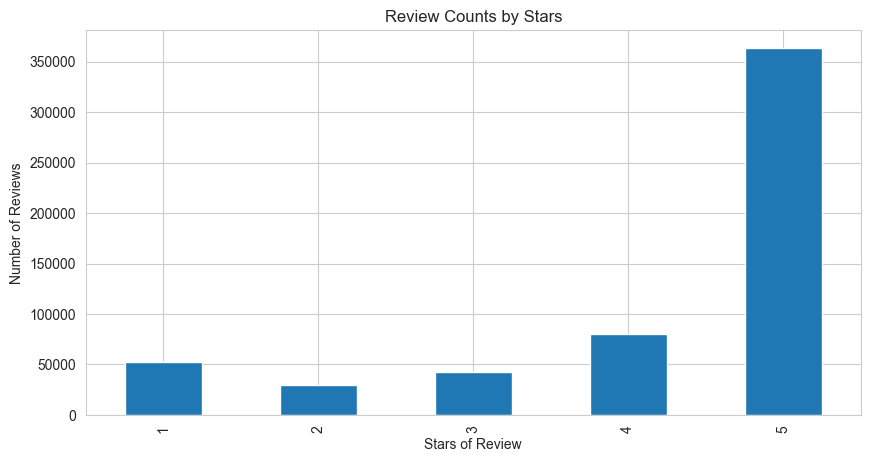

In [7]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Review Counts by Stars',
          figsize=(10, 5))
ax.set_xlabel("Stars of Review")
ax.set_ylabel("Number of Reviews")
plt.show()


# 2. Sentence Processing

In [75]:
# Extract sample review
sample = df['Text'][1794]
print(sample)

I decided to try these based on the reviews - they are pretty good - especially for a more healthy option, but not sure I'll get them again.


In [77]:
# Tokenization
tokens = nltk.word_tokenize(sample)
print(tokens)

['I', 'decided', 'to', 'try', 'these', 'based', 'on', 'the', 'reviews', '-', 'they', 'are', 'pretty', 'good', '-', 'especially', 'for', 'a', 'more', 'healthy', 'option', ',', 'but', 'not', 'sure', 'I', "'ll", 'get', 'them', 'again', '.']


In [79]:
# Part of speech analysis
pos_tagged = nltk.pos_tag(tokens)
print(pos_tagged[:10])

[('I', 'PRP'), ('decided', 'VBD'), ('to', 'TO'), ('try', 'VB'), ('these', 'DT'), ('based', 'VBN'), ('on', 'IN'), ('the', 'DT'), ('reviews', 'NNS'), ('-', ':')]


In [80]:
# Named Entities Analysis
ne = nltk.chunk.ne_chunk(pos_tagged)
ne.pprint()

(S
  I/PRP
  decided/VBD
  to/TO
  try/VB
  these/DT
  based/VBN
  on/IN
  the/DT
  reviews/NNS
  -/:
  they/PRP
  are/VBP
  pretty/RB
  good/JJ
  -/:
  especially/RB
  for/IN
  a/DT
  more/RBR
  healthy/JJ
  option/NN
  ,/,
  but/CC
  not/RB
  sure/JJ
  I/PRP
  'll/MD
  get/VB
  them/PRP
  again/RB
  ./.)


# 3. Analysis of different models for sentiment analysis

## 3.1 My model using TF-IDF - an improved version of the bag-of-words approach

In [82]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import re 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df = pd.read_csv('./data/Reviews.csv') 

In [86]:
# Turn sentiment into stricter values
def create_sentiment(rating):
    
    res = 0 # neutral sentiment
    
    if rating==1 or rating==2:
        res = -1 # negative sentiment
    elif rating==4 or rating==5:
        res = 1 # positive sentiment
        
    return res
df['Sentiment'] = df['Score'].apply(create_sentiment)
print(df[['Text', 'Sentiment']])

                                                     Text  Sentiment
0       I have bought several of the Vitality canned d...          1
1       Product arrived labeled as Jumbo Salted Peanut...         -1
2       This is a confection that has been around a fe...          1
3       If you are looking for the secret ingredient i...         -1
4       Great taffy at a great price.  There was a wid...          1
...                                                   ...        ...
568449  Great for sesame chicken..this is a good if no...          1
568450  I'm disappointed with the flavor. The chocolat...         -1
568451  These stars are small, so you can give 10-15 o...          1
568452  These are the BEST treats for training and rew...          1
568453  I am very satisfied ,product is as advertised,...          1

[568454 rows x 2 columns]


In [89]:
# Preprocess data ba cleaning punctuation and number symbols
def clean_data(review):
    
    no_punc = re.sub(r'[^\w\s]', '', review)
    no_digits = ''.join([i for i in no_punc if not i.isdigit()])
    
    return(no_digits)
df['Text'] = df['Text'].apply(clean_data)
print(df[['Text', 'Sentiment']])

                                                     Text  Sentiment
0       I have bought several of the Vitality canned d...          1
1       Product arrived labeled as Jumbo Salted Peanut...         -1
2       This is a confection that has been around a fe...          1
3       If you are looking for the secret ingredient i...         -1
4       Great taffy at a great price  There was a wide...          1
...                                                   ...        ...
568449  Great for sesame chickenthis is a good if not ...          1
568450  Im disappointed with the flavor The chocolate ...         -1
568451  These stars are small so you can give  of thos...          1
568452  These are the BEST treats for training and rew...          1
568453  I am very satisfied product is as advertised I...          1

[568454 rows x 2 columns]


In [96]:
# Calculate TF-IDF
tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)
X = tfidf.fit_transform(df['Text'])
y = df['Sentiment']
X_train, X_test, Y_train, Y_test = train_test_split(X,y)
print(X_train)

  (0, 122588)	0.29145445603021997
  (0, 254967)	0.25388915000644535
  (0, 60426)	0.29722328914632834
  (0, 185490)	0.22717966086719316
  (0, 196304)	0.2330526385673418
  (0, 158740)	0.16401896676645902
  (0, 126136)	0.15252546455016622
  (0, 204031)	0.1524226612545809
  (0, 250280)	0.21871561747742768
  (0, 255414)	0.1672840372194188
  (0, 130852)	0.18841645067164292
  (0, 271714)	0.18014197514200267
  (0, 86048)	0.16630056162453277
  (0, 91354)	0.13144783254276968
  (0, 234036)	0.2744980392911747
  (0, 254490)	0.2001426758269706
  (0, 103561)	0.17515508459550622
  (0, 139425)	0.15798454167044973
  (0, 184790)	0.11462083229835413
  (0, 170999)	0.19070756641275435
  (0, 195511)	0.07801846666446176
  (0, 97192)	0.14918259107555434
  (0, 155043)	0.10560147546600375
  (0, 172508)	0.06929750278531344
  (0, 271223)	0.07984786091307189
  :	:
  (426339, 22765)	0.20380712406592028
  (426339, 250953)	0.16190281919496435
  (426339, 199424)	0.17720697864999202
  (426339, 236152)	0.1432045891494507

In [97]:
# Define Logistic Regression Model
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,Y_train)
preds = lr.predict(X_test)
accuracy_score(preds,Y_test)

0.8785270979636067